# Poincare Map

In [3]:
import rebound
import numpy as np

In [4]:
def hyper(sim):
    return sim.particles[2].x

In [19]:
N_points_max = 100000
N_points = 0
poincare_map = np.zeros((N_points_max,2))


while N_points <N_points_max:
    sim = rebound.Simulation()
    sim.integrator = "ias15"
    sim.add(m=1.)
    sim.add(m=0, a=np.random.uniform(0.4,0.7),anom=np.random.uniform(0.,2.*np.pi))
    sim.add(m=1e-3, a=1.)
    sim.move_to_com()
    dt = 0.3
    dt_epsilon = 0.001
    sign = hyper(sim)
    while sim.t<1000. and N_points < N_points_max:
        oldt = sim.t
        olddt = sim.dt
        sim.integrate(oldt+dt)
        nsign = hyper(sim)
        if sign*nsign < 0.:
            leftt = oldt
            rightt = sim.t
            sim.dt = -olddt
            while (rightt-leftt > dt_epsilon):
                midt = (leftt+rightt)/2.
                sim.integrate(midt)
                msign = hyper(sim)
                if msign*nsign < 0.:
                    rightt = midt
                    sim.dt = -olddt
                else:
                    leftt = midt
                    sim.dt = olddt
            #orbits = sim.calculate_orbits()
            #poincare_map[N_points] = [orbits[0].a, orbits[0].e]
            p = sim.particles[1]
            poincare_map[N_points] = [p.x,p.vx]
            N_points += 1
            sim.dt = olddt
        sign = nsign

Plot

714.025453513


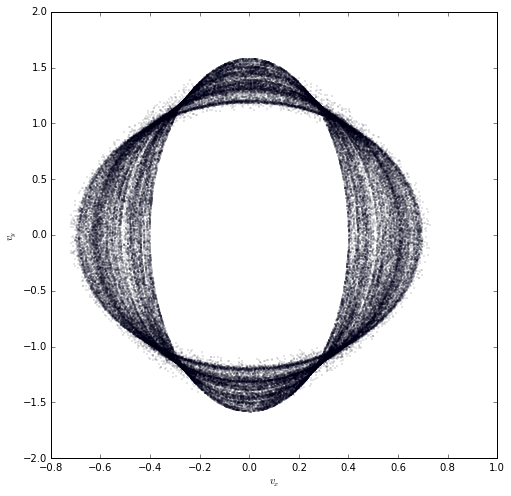

In [22]:
%matplotlib inline
pm_x = poincare_map[:,0]
pm_y = poincare_map[:,1]
if 0:
    pm_maskedx = np.ma.masked_where(pm_x>0., pm_x)
    pm_maskedy = np.ma.masked_where(pm_x>0., pm_y)
else:
    pm_maskedx = pm_x
    pm_maskedy = pm_y

    
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111)
ax.set_xlabel("$v_x$")
ax.set_ylabel("$v_y$")
plt.scatter(pm_maskedx,pm_maskedy,marker=".",s=1.,alpha=.2481)
print sim.t